In [11]:
# Data set name appliance_energy.csv

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [9]:
import pandas as pd
df =  pd.read_csv("appliance_energy.csv")
df.head(10)

,Temperature (°C),Energy Consumption (kWh)
0,22.490802,2.292604
1,34.014286,3.251925
2,29.639879,3.009868
3,26.973170,1.703533
4,18.120373,1.702201
5,18.119890,1.990545
6,16.161672,2.355114
7,32.323523,2.973217
8,27.022300,2.297983
9,29.161452,2.665267


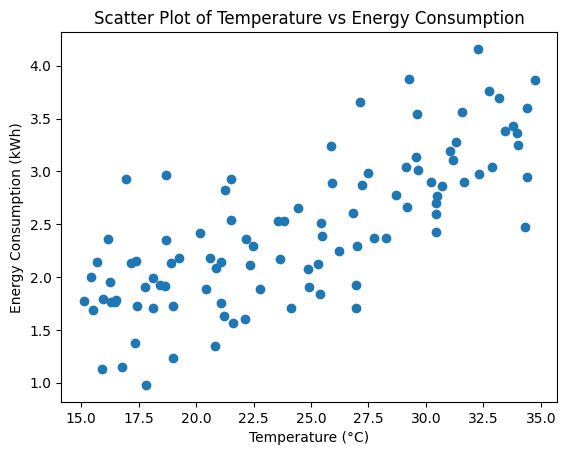

In [16]:

plt.scatter(df['Temperature (°C)'], df['Energy Consumption (kWh)'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Scatter Plot of Temperature vs Energy Consumption')
plt.show()



In [17]:
df.describe()

,Temperature (°C),Energy Consumption (kWh)
count,100.000000,100.000000
mean,24.403615,2.439821
std,5.949788,0.693527
min,15.110442,0.978107
25%,18.864015,1.908640
50%,24.282849,2.364121
75%,29.604062,2.931199
max,34.737739,4.159094


In [18]:
df.isnull().sum()

Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64

In [38]:
# Model Training 

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
X = df[['Temperature (°C)']]
y = df['Energy Consumption (kWh)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [35]:
y_pred = model.predict(X_test)


In [36]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 0.16342487842925052
Mean Absolute Error: 0.2956712889594888


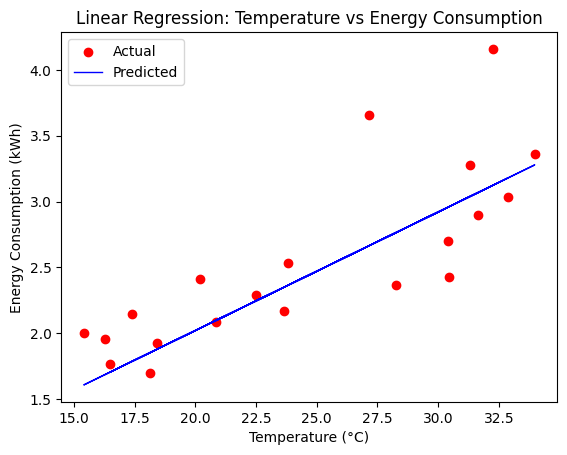

In [39]:
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=1, label='Predicted')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Linear Regression: Temperature vs Energy Consumption')
plt.legend()
plt.show()


In [41]:
intercept = model.intercept_
print(f'Intercept: {intercept}')

Intercept: 0.22196391661907677


In [43]:
slope = model.coef_[0]
print(f'Slope: {slope}')

Slope: 0.0899661828740138


In [44]:
import joblib
joblib.dump(model,"application_energy.pkl")

['application_energy.pkl']

In [56]:
import joblib
import pandas as pd
loaded_model = joblib.load('application_energy.pkl')
new_data = pd.DataFrame({'Temperature (°C)': [25, 30, 35]})
predictions = loaded_model.predict(new_data)
print(predictions)


[2.47111849 2.9209494  3.37078032]


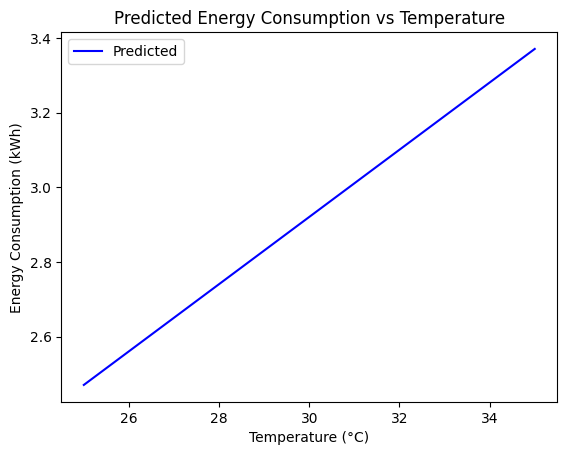

In [57]:

plt.plot(new_data['Temperature (°C)'], predictions, color='blue', label='Predicted')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Predicted Energy Consumption vs Temperature')
plt.legend()
plt.show()
